In [97]:
#jupyter 에서만 
%matplotlib inline  
import matplotlib.pyplot as plt  #시각화할때
import mglearn #학습도움을 위해서

#랜덤하게 사이즈를 채운 후 행렬제곱을 하면 =>대칭행렬
#고유값분해=고유값, 고유벡터(정직교)
#MDS 행렬곱 (직교하는 2,3차원):2차원이나 3차원 특징추출
#forward propagation 순전파:예측분류과정 (가중치가 랜덤하게 생김)
#backward proepagtion 역전파:가중치 학습과정  (cost function 의 기울기, learning rate)
#MLP :multi layer perception :FFNN(feed forward neural network)
#solver:미분,learning-rate 를 조절 =>가중치를 조절  
#estimator,transformer->solver

from sklearn.neural_network import MLPClassifier #MLPRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

C:\Users\ICT01_23\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, '특성1')

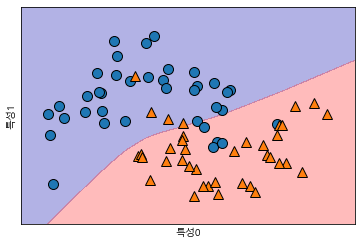

In [98]:
#straitfy 층화 변수 선택법
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

#multi layer ->XOR 문제를 해결, 레이어가 많으면 정밀도 자동으로 
mlp=MLPClassifier(random_state=0).fit(X_train,y_train)

#fit 가중치가 완성이 되었다.-레이어 지정 자동으로 mlpclassifier 가 가중레이어를 지정

mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('특성0')
plt.ylabel('특성1')

In [99]:
mlp.get_params()  #디폴트 매개변수확인
#relu : 0이하를 제거한 활성화 함수 (activation 함수)
#속도가 빨라짐 
#epoch 1회 반복 
#solver가 adam : learning-rate 를 조절, monentum을 사용하는 opimizer (최적화기)


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [100]:
mlp.n_layers_

3

In [101]:
mlp.coefs_ #coeficient , bias:계수들이 0으로 가는 것을 방지해서 처음에 1로 세팅

[array([[ 1.96423650e-01,  1.86414048e-01,  2.73074871e-02,
          1.32154297e-01, -9.48047217e-05,  2.82807555e-03,
         -7.29479240e-02,  1.45878653e-01,  2.97837159e-01,
         -1.12611776e-01,  2.34714552e-01,  1.30702586e-01,
         -2.85623212e-02,  1.12399918e-01, -1.71442282e-01,
         -3.24829063e-01, -3.85153290e-01,  2.38832765e-01,
          2.13193712e-01,  2.63746115e-01,  1.70653255e-01,
          7.41106685e-02,  1.04573476e-01,  6.73150355e-02,
         -3.77696555e-01,  1.10071889e-01,  4.88102808e-03,
          3.03409150e-01, -6.64267214e-02, -1.08723630e-01,
         -2.67443736e-01,  2.19702964e-01, -9.77933350e-02,
          3.95350833e-05, -1.67873856e-01,  1.32818304e-01,
          2.23922646e-02, -1.13671191e-02,  2.94106612e-01,
          3.48486041e-02, -1.28573692e-01, -1.62111791e-05,
          1.34093216e-01, -3.48957410e-01,  1.73951614e-01,
          2.50280090e-02, -3.77490782e-01, -3.22208104e-01,
         -8.09493846e-02, -4.14861544e-0

In [102]:
mlp.classes_

array([0, 1], dtype=int64)

In [103]:
mlp.n_outputs_

1

Text(0, 0.5, '특성1')

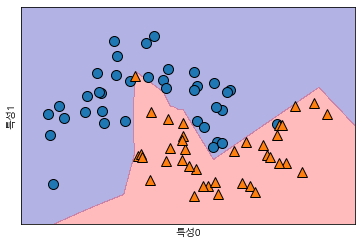

In [104]:
#레이어를 10개 이상주면 기울기 소실 문제가 발생한다.
#multilayer =>xor 문제를 해결, 정확도 높아지는 것 발견

mlp=MLPClassifier(solver='lbfgs', #과적합  #레이어 2개가 출력차수
                  random_state=0,hidden_layer_sizes=[10,10])


#svm 의 논리:고차원으로 데이터 확대 (고차원을 선호하는 모델)
    #정확도가 높아
    #과적합을 방지
    #svc(classifier) ,svr(regressor)
#10,10 에서 히든 레이어 사이즈 지정시 무엇을 지정하는가
#출력차수만 지정해주면 됨 ()
#2x10, 10x10
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('특성0')
plt.ylabel('특성1')

In [ ]:
#blackbox:알수 없는 값들로 이루어짐->원인 규명

mlp.coefs_
#2x10 bias 가 10
#변수는 2x10 , 10x10  #10으로 나감
#5,10
#레이어의 사이즈를 지정 출력차수만 지정(5,10):입력 데이터
#2x5, 5x10

Text(0, 0.5, '특성1')

C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


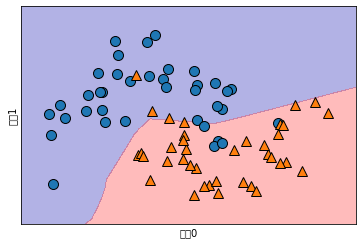

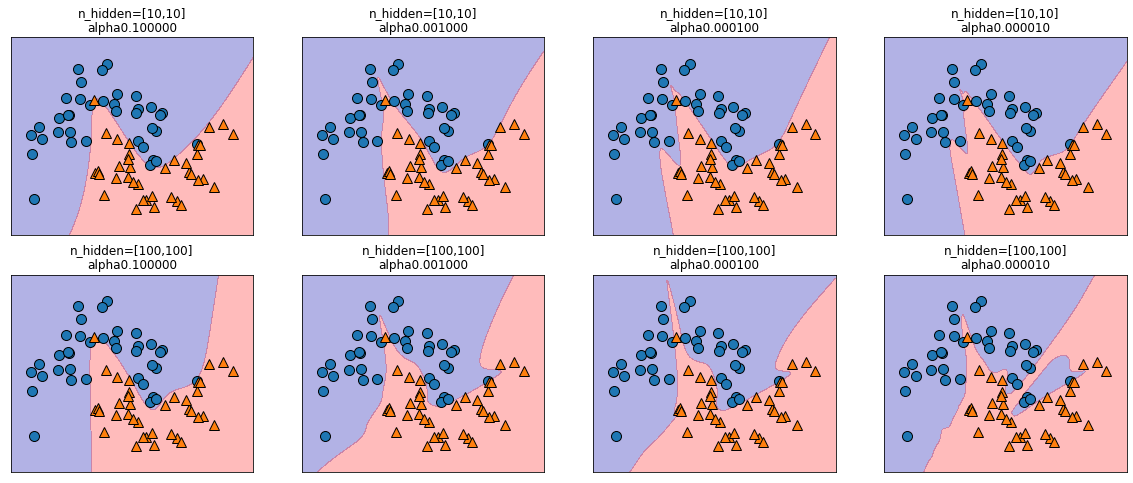

In [38]:
fig,axes=plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[10,100]):
    for ax, alpha in zip(axx,[0.1,0.001,0.0001,0.00001]):
        mlp=MLPClassifier(solver='lbfgs',random_state=0,activation='tanh',
                         hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],   #hidden, alpha 규제
                         alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha{:4f}".format(n_hidden_nodes,
                                                          n_hidden_nodes,
                                                          alpha))

In [41]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print('유방암 데이터의 특성별 최대값:\n{}'.format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [44]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
mlp=MLPClassifier(random_state=42) #디폴트
mlp.fit(X_train,y_train)#가중치결정
print('훈련 세트 정확도:{:.2f}'.format(mlp.score(X_train,y_train)))  #94 
print('테스트 세트 정확도:{:.2f}'.format(mlp.score(X_test,y_test)))  #92
mlp

#train 작게 나오면 데이터 추가, 알파값 늘려주고, 가중치 조절 20%정도 차이나면 

훈련 세트 정확도:0.94
테스트 세트 정확도:0.92


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [45]:
mean_on_train=X_train.mean(axis=0) #평균
std_on_train=X_train.std(axis=0)  #표준편차

X_train_scaled=(X_train-mean_on_train)/std_on_train  #z점수 표준화 (훈련데이터-평균)/ 표준편차
X_test_scaled=(X_test-mean_on_train)/std_on_train    #             (테스트데이터-평균)/표준편차

mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled,y_train)))  #99%
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))  #96%

훈련 세트 정확도:0.991
테스트 세트 정확도:0.965


C:\Users\ICT01_23\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [46]:
mlp=MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled,y_train))) #100%
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test))) #97%    나쁜 경우 


훈련 세트 정확도:1.000
테스트 세트 정확도:0.972


In [47]:
#훈련세트 정확도 와 테스트 세트 정확도가 거의 같아지면 '일반화'
mlp=MLPClassifier(max_iter=1000,alpha=1,random_state=0)
mlp.fit(X_train_scaled,y_train)

print("훈련 세트 정확도:{:.3f}".format(mlp.score(X_train_scaled,y_train)))  #98%
print("테스트 세트 정확도:{:.3f}".format(mlp.score(X_test_scaled,y_test)))  #97%

훈련 세트 정확도:0.988
테스트 세트 정확도:0.972


In [48]:
mlp.coefs_

[array([[ 1.38710846e-02, -2.50121951e-02,  3.66222579e-02, ...,
         -3.47572622e-02, -2.24282383e-03, -1.97638723e-02],
        [ 1.26462143e-02, -6.82790623e-02,  3.70303247e-02, ...,
         -3.34389785e-02, -1.21200193e-02, -6.54680585e-02],
        [ 8.50428302e-03, -2.63297307e-02,  2.95094391e-02, ...,
         -1.72355685e-02,  1.05053722e-03, -1.30428184e-02],
        ...,
        [ 3.01969223e-03, -5.25847578e-02,  6.51799188e-02, ...,
         -4.07129917e-02, -3.25647552e-03, -3.30615217e-02],
        [-1.19219311e-03, -2.78480036e-02,  2.08436140e-02, ...,
         -2.74572097e-02,  5.09456645e-05, -2.03324679e-02],
        [-2.15747657e-02, -2.94202234e-02,  3.25639515e-02, ...,
         -2.14904553e-02, -4.01600447e-03, -2.92891532e-02]]),
 array([[-0.09540798],
        [ 0.23756701],
        [-0.19771946],
        [ 0.30384496],
        [ 0.16202467],
        [-0.00111623],
        [ 0.18081763],
        [ 0.08990004],
        [ 0.2707616 ],
        [-0.26194311],

C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45787 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 4576

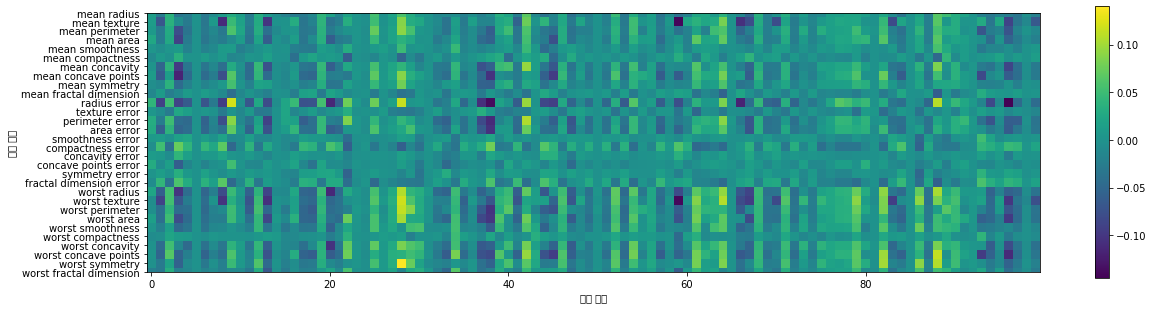

In [53]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()



In [54]:
#문제
import pandas as pd

wine = pd.read_csv('./wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8") 
wine

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [56]:
wine.shape #178 관측치 14변수 #변수:독립변수와 종속변수

(178, 14)

In [57]:
X=wine.drop("Cultivator",axis=1)
y=wine["Cultivator"]

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y) #75% 25%

In [59]:
print(y.unique())

[1 2 3]


In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [71]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [72]:
from sklearn.neural_network import MLPClassifier

#디폴트 hidden_layer_sizes =100

mlp=MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

#precision 정밀도 =TP / (TP + FP) ->예측을 중심으로 생각
#racll:재현율 =TP / (TP + TN)->실제값을 중심으로 생각
#f1-score :2*(precision *recall)/(precision + recall)

predictions=mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

#1,2,3의 의미 unique 
#

[[16  0  0]
 [ 0 17  3]
 [ 0  0  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.85      0.92        20
           3       0.75      1.00      0.86         9

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.93        45
weighted avg       0.95      0.93      0.94        45



(13, 30)
(30, 30)
(30, 30)


Text(0, 0.5, '은닉 유닛')

C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45787 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_23\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 4576

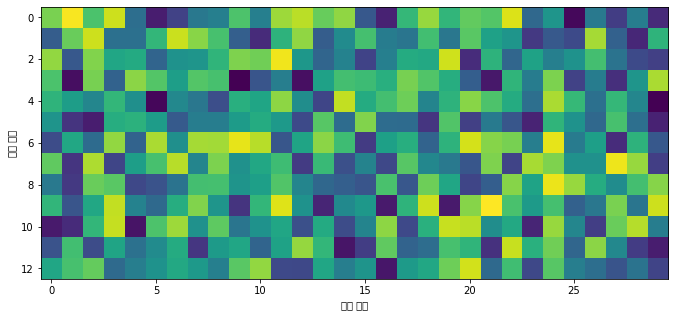

In [74]:
print(mlp.coefs_[0].shape)
print(mlp.coefs_[1].shape)
print(mlp.coefs_[2].shape)
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.xlabel('은닉 유닛')
plt.ylabel('은닉 유닛')

In [ ]:
#NMF (Non-negative-matrix factorization):비음수행렬분해
#pca 는 음수 와 양수의 차이를 상계해서 처리
#양수인 데이터에 적용 예)음성데이터 , signal

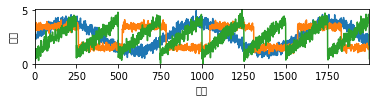

In [76]:
S=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel('시간')
plt.ylabel('신호')
plt.margins(0)

In [80]:
import numpy as np
#noise:전송데이터
A=np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S,A.T)
print('측정데이터 형태:{}'.format(X.shape))

측정데이터 형태:(2000, 100)


In [82]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=3,random_state=42)
S_=nmf.fit_transform(X)
print('복원한 신호 데이터 형태:{}'.format(S.shape))

복원한 신호 데이터 형태:(2000, 3)


In [83]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
H=pca.fit_transform(X)

In [84]:
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

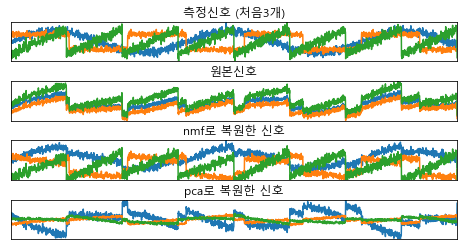

In [90]:
       #원본, 노이즈, nmf ,pca
models=[S,X,S_,H]  #노이즈: 양수 데이터는 노이즈를 제거못함
names=['측정신호 (처음3개)','원본신호','nmf로 복원한 신호','pca로 복원한 신호']
fig,axes=plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5},subplot_kw={"xticks":(),"yticks":()})
for model,name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3],"-")
    ax.margins(0)

In [ ]:
#군집분석 시각화